In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# scale the pixel intensities down to the 0-1 range and convert them to floats
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

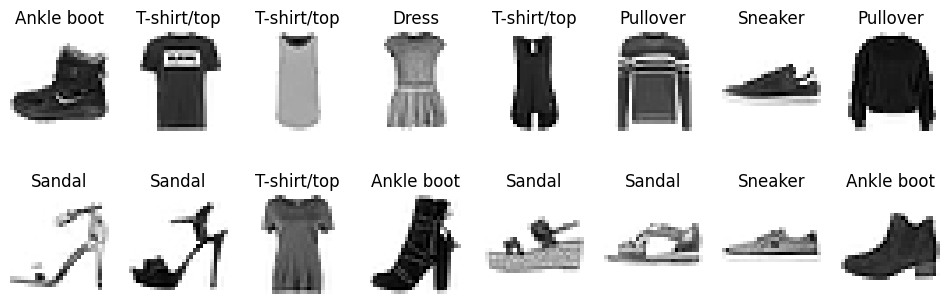

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
  "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

import matplotlib.pyplot as plt
def plot_image(X):
	# format the plot into n rows and 8 columns
	ncol = 8
	nrow = len(X) // ncol + 1
	plt.figure(figsize=(ncol*1.5, nrow*2))
	for index, image in enumerate(X):
		plt.subplot(nrow, ncol, index+1)
		plt.imshow(image, cmap="binary", interpolation="nearest")
		plt.axis('off')
		plt.title(class_names[y_train[index]], fontsize=12)
	plt.show()

plot_image(X_train[:16])

In [4]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential([
	tf.keras.layers.Flatten(input_shape=[28, 28]),
	tf.keras.layers.Dense(300, activation="relu"),
	tf.keras.layers.Dense(100, activation="relu"),
	tf.keras.layers.Dense(10, activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy",
			  optimizer="sgd",
			  metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
					validation_data=(X_valid, y_valid))



Epoch 1/30
1719/1719 [==============================] - 2s 843us/step - loss: 0.7125 - accuracy: 0.7683 - val_loss: 0.5005 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 1s 743us/step - loss: 0.4887 - accuracy: 0.8309 - val_loss: 0.4646 - val_accuracy: 0.8330
Epoch 3/30
1719/1719 [==============================] - 1s 736us/step - loss: 0.4423 - accuracy: 0.8452 - val_loss: 0.4311 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 1s 720us/step - loss: 0.4176 - accuracy: 0.8546 - val_loss: 0.3993 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 1s 724us/step - loss: 0.3966 - accuracy: 0.8619 - val_loss: 0.3956 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 1s 740us/step - loss: 0.3802 - accuracy: 0.8667 - val_loss: 0.3999 - val_accuracy: 0.8576
Epoch 7/30
1719/1719 [==============================] - 1s 736us/step - loss: 0.3676 - accuracy: 0.8703 - val_loss: 0.3774 -

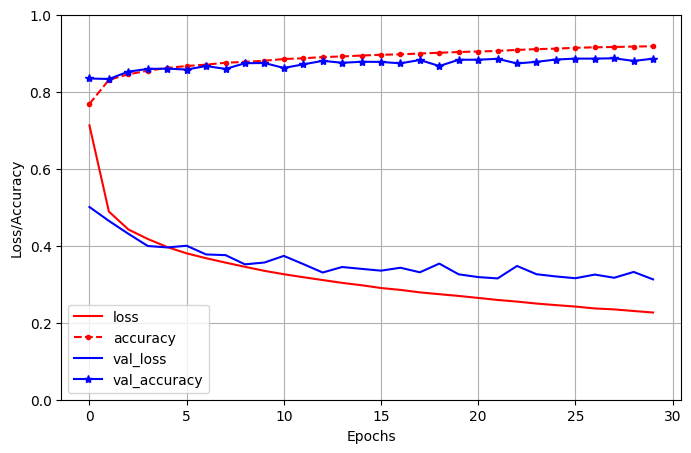

In [5]:
# plot the learning curves

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5), grid=True, ylim=(0, 1), xlabel="Epochs", 
								  ylabel="Loss/Accuracy",
								  style=['r-', 'r--.', 'b-', 'b-*'])

plt.show()


1/1 [==============================] - 0s 8ms/step
Predicted classes: [9 2 1 1 6 1 4 6 5 7]
Actual classes:    [9 2 1 1 6 1 4 6 5 7]


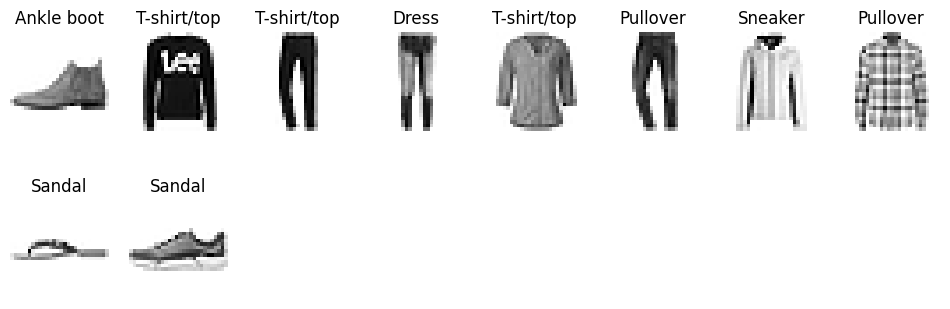

In [6]:

# evaluate the model on the test set

model.evaluate(X_test, y_test)

X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)

print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:10])

plot_image(X_new)
